In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [2]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.__version__

'2.19.0'

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
## Data Visualization
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

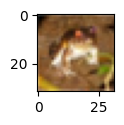

In [9]:
plot_sample(0)

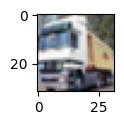

In [10]:
plot_sample(1)

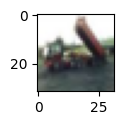

In [11]:
plot_sample(2)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


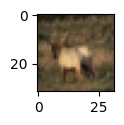

In [14]:
plot_sample(3)

In [13]:
classes[y_train[3][0]]

'deer'

In [15]:
y_test.shape


(10000, 1)

## Preprocessing Scale images

In [16]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [18]:
y_train_categorical=keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical=keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Model building and training

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3058 - loss: 1.9297
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4189 - loss: 1.6476
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4510 - loss: 1.5494
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4776 - loss: 1.4764
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4956 - loss: 1.4336


In [24]:
classes[np.argmax(model.predict(X_test_scaled)[0])]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'cat'

In [25]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [26]:
#measure on CPU
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model = get_model()
    model.fit(X_train_scaled, y_train_categorical, epochs=1)

UsageError: Line magic function `%%timeit` not found.
